# <span style="color:green"> Data exploration-Airline Reviews
#### dataset from Skytrax
### By Carolyne Machuka

## Collecting Data

In [227]:
import importlib

packages = ["pandas", "requests" ,"beautifulsoup4","fractions", "os", "re", "seaborn", "matplotlib.pyplot", "nltk", "textblob" , "wordcloud", "scikit-learn"] 

for package in packages:
    try:
        importlib.import_module(package)
        print(f"{package} is installed.")
    except ImportError:
        print(f"{package} is NOT installed.")
        

pandas is installed.
requests is installed.
beautifulsoup4 is NOT installed.
fractions is installed.
os is installed.
re is installed.
seaborn is installed.
matplotlib.pyplot is installed.
nltk is installed.
textblob is installed.
wordcloud is installed.
scikit-learn is NOT installed.


In [223]:
!pip install beautifulsoup4 textblob wordcloud scikit-learn seaborn 

     ------------------------------------ 624.3/624.3 kB 222.0 kB/s eta 0:00:00
     ------------------------------------- 299.8/299.8 kB 90.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 149.5 kB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [224]:
!pip list | grep nltk

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os

# Create "data" folder if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

print("Folder 'data' is ready!")


Folder 'data' is ready!


In [228]:
import bs4
import sklearn
print("BeautifulSoup and Scikit-learn are installed successfully!")

BeautifulSoup and Scikit-learn are installed successfully!


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import fractions

# Define the  British airline review URL 
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}/"

# Number of pages to scrape (Adjust as needed)
num_pages = 80

# List to store scraped data
reviews_list = []

# Loop through multiple pages
for page in range(1, num_pages + 1):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    
    
    # Send request and parse HTML
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    # Find all review containers
    reviews = soup.find_all("article", class_=["comp", "comp_reviews-review"])
    
    
    for review in reviews:
        try:
        # Find the rating and best rating inside the review
            rating_tag = review.find("span", itemprop="ratingValue")
            best_rating_tag = review.find("span", itemprop="bestRating")
        
        # Extract and clean text
            rating = rating_tag.text.strip() if rating_tag else "No Rating"
            best_rating = best_rating_tag.text.strip() if best_rating_tag else "No Best Rating"
        
        # Combine both into a single string output
            ratings = f"{rating}/{best_rating}"
        
        except AttributeError:
            ratings = "No Rating/No Best Rating"  # Handle missing values
    

        try:
            title = review.find("h2").text.strip()
        except AttributeError:
            title = "No Title"
        
        try:
            content = review.find("div", class_="text_content").text.strip()
        except AttributeError:
            content = "No Review"

        try:
            date = review.find("time").text.strip()
        except AttributeError:
            date = "No Date"
        
        # Append data
        reviews_list.append([date, ratings, title, content])
    
    # Sleep to avoid being blocked
    time.sleep(2)

# Convert to DataFrame
df = pd.DataFrame(reviews_list, columns=["Date", "ratings", "Title", "Review"])

# Save to CSV
df.to_csv("data/skytrax_reviews.csv", index=False)
print("Scraping completed! Data saved to 'data/skytrax_reviews.csv'.")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [42]:
# Load the CSV file
df = pd.read_csv("data/skytrax_reviews.csv")

# Display the last 10 rows
print (df.tail(10))

               Date                   ratings  \
950  31st July 2020                      2/10   
951  23rd July 2020                      1/10   
952  23rd July 2020                      1/10   
953  11th June 2020                      1/10   
954   8th June 2020                      8/10   
955   6th June 2020                      1/10   
956   4th June 2020                      2/10   
957   29th May 2020                      1/10   
958   18th May 2020                      1/10   
959         No Date  No Rating/No Best Rating   

                                      Title  \
950    "have to call to redeem the voucher"   
951               "Service is non-existent"   
952              "BA has failed completely"   
953  "This is appalling business practice!"   
954         "efficient, clean and punctual"   
955                        " Total rip off"   
956              "totally ripped off by BA"   
957     "tickets should have been refunded"   
958         "unable to offer a full r

In [46]:
df.loc[959]

Date                        No Date
ratings    No Rating/No Best Rating
Title                      No Title
Review                    No Review
Name: 959, dtype: object

In [32]:
print(reviews[0].prettify())  # Show full structure of one review


<article class="comp comp_reviews-airline querylist position-content">
 <div class="pagination-controls">
  <div class="pagination-filter">
   <form method="get">
    <span class="pagination-label">
     Filter Reviews by :
    </span>
    <input name="pagesize" type="hidden" value="10">
     <select class="page-filter-selector" data-onchange-submit="" name="filterby">
      <option selected="" value="">
       Latest reviews
      </option>
      <option value="cabin:first">
       First Class
      </option>
      <option value="cabin:business">
       Business Class
      </option>
      <option value="cabin:p_economy">
       Premium Economy
      </option>
      <option value="cabin:economy">
       Economy Class
      </option>
     </select>
    </input>
   </form>
  </div>
  <div class="pagination-size">
   <form method="get">
    <span class="pagination-label">
     Show
    </span>
    <input name="sortby" type="hidden" value="post_date:Desc">
     <ul class="page-size-select

In [16]:
articles = soup.find_all("article")
unique_classes = {tuple(article.get("class", [])) for article in articles}

for classes in unique_classes:
    print(classes)

('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-910682')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-909802')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-911476')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-910891')
('comp', 'comp_reviews-airline', 'querylist', 'position-content')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-909798')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-909771')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-911483')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-909961')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', 'review-911639')
('comp', 'comp_media-review-rated', 'list-item', 'media', 'position-content', '

In [8]:
# Preliminary Assessment of Data
print(df.info())   # Check column types and missing values
print(df.shape)    # Check number of rows and columns
print(df.duplicated().sum()) # Count duplicate rows
print(df.isnull().sum()) # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     960 non-null    object
 1   ratings  960 non-null    object
 2   Title    960 non-null    object
 3   Review   960 non-null    object
dtypes: object(4)
memory usage: 30.1+ KB
None
(960, 4)
159
Date       0
ratings    0
Title      0
Review     0
dtype: int64


In [36]:
print(df["ratings"].value_counts())


1/10                        356
2/10                        100
3/10                         80
No Rating/No Best Rating     80
8/10                         65
9/10                         64
10/10                        61
4/10                         52
5/10                         39
7/10                         32
6/10                         31
Name: ratings, dtype: int64


In [37]:
print(df["ratings"].value_counts(normalize=True) * 100)

1/10                        37.083333
2/10                        10.416667
3/10                         8.333333
No Rating/No Best Rating     8.333333
8/10                         6.770833
9/10                         6.666667
10/10                        6.354167
4/10                         5.416667
5/10                         4.062500
7/10                         3.333333
6/10                         3.229167
Name: ratings, dtype: float64


In [42]:
print(clean_df["ratings"].value_counts(normalize=True) * 100)

1/10                        40.574282
2/10                        11.235955
3/10                         9.113608
8/10                         7.365793
9/10                         6.866417
10/10                        6.741573
4/10                         6.242197
5/10                         4.369538
7/10                         3.745318
6/10                         3.620474
No Rating/No Best Rating     0.124844
Name: ratings, dtype: float64


In [169]:
print(df["Date"].unique() )

['16th March 2025' '7th March 2025' '28th February 2025'
 '27th February 2025' '21st February 2025' '18th February 2025'
 '14th February 2025' 'No Date' '7th February 2025' '1st February 2025'
 '20th January 2025' '19th January 2025' '15th January 2025'
 '9th January 2025' '5th January 2025' '4th January 2025'
 '3rd January 2025' '1st January 2025' '17th December 2024'
 '14th December 2024' '13th December 2024' '12th December 2024'
 '6th December 2024' '2nd December 2024' '29th November 2024'
 '23rd November 2024' '18th November 2024' '17th November 2024'
 '15th November 2024' '13th November 2024' '8th November 2024'
 '7th November 2024' '5th November 2024' '3rd November 2024'
 '2nd November 2024' '31st October 2024' '25th October 2024'
 '24th October 2024' '22nd October 2024' '14th October 2024'
 '12th October 2024' '9th October 2024' '8th October 2024'
 '6th October 2024' '5th October 2024' '4th October 2024'
 '28th September 2024' '25th September 2024' '24th September 2024'
 '22nd S

In [45]:
# Checking Date data type of Date column
pd.to_datetime(df["Date"], errors="coerce").notna().all()

False

In [170]:
df.loc[959]

Date                        No Date
ratings    No Rating/No Best Rating
Title                      No Title
Review                    No Review
Name: 959, dtype: object

# Data assessment: Quality and Tidiness

- Duplicate data
- Nulls in ratings columns
- Nulls in date column
- Convertion of date to datetime data type
- Convertion of ratings to a float data type


## Data Cleaning

In [247]:
# Making a copy of the original data
clean_df= df.copy()
clean_df.tail()

,Date,ratings,Title,Review
955,6th June 2020,1/10,""" Total rip off""",✅ Trip Verified | Total rip off. British Airw...
956,4th June 2020,2/10,"""totally ripped off by BA""",Not Verified | I booked flights to Rome from ...
957,29th May 2020,1/10,"""tickets should have been refunded""",✅ Trip Verified | I booked a trip to Spain fo...
958,18th May 2020,1/10,"""unable to offer a full refund""",✅ Trip Verified | I booked London to Tel Aviv...
959,No Date,No Rating/No Best Rating,No Title,No Review


In [248]:

clean_df.drop_duplicates(inplace=True,ignore_index=True) #drop duplicates
print(clean_df.duplicated().sum()) # Count duplicate rows


0


In [189]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     801 non-null    object
 1   ratings  801 non-null    object
 2   Title    801 non-null    object
 3   Review   801 non-null    object
dtypes: object(4)
memory usage: 25.2+ KB


In [235]:
print(clean_df)

                   Date ratings                                Title  \
0       16th March 2025    1/10   "flight was delayed nearly 1 hour"   
1       16th March 2025    3/10             "full of attitude to me"   
2       16th March 2025    1/10             "service was outrageous"   
3        7th March 2025    9/10    "managed to get everything right"   
4    28th February 2025    9/10           "The seats were excellent"   
..                  ...     ...                                  ...   
796       8th June 2020    8/10      "efficient, clean and punctual"   
797       6th June 2020    1/10                     " Total rip off"   
798       4th June 2020    2/10           "totally ripped off by BA"   
799       29th May 2020    1/10  "tickets should have been refunded"   
800       18th May 2020    1/10      "unable to offer a full refund"   

                                                Review  
0    Trip Verified Another awful experience by Brit...  
1    Trip Verified Th

In [125]:
print(clean_df["ratings"].value_counts())

1/10                        325
2/10                         90
3/10                         73
8/10                         59
9/10                         55
10/10                        54
4/10                         50
5/10                         35
7/10                         30
6/10                         29
No Rating/No Best Rating      1
Name: ratings, dtype: int64


In [249]:
# Replace "No Rating" with NaN
clean_df["ratings"] = clean_df["ratings"].replace("No Rating/No Best Rating", pd.NA)



# Drop rows where 'ratings' is NaN (in-place)
clean_df.dropna(subset=["ratings"], inplace=True)

# Convert "9/10" format to float
clean_df["ratings"] = clean_df["ratings"].apply(lambda x: float(x.split("/")[0]) / 10 if pd.notna(x) else x)


clean_df.tail()

,Date,ratings,Title,Review
796,8th June 2020,0.8,"""efficient, clean and punctual""",✅ Trip Verified | A short hop from London to ...
797,6th June 2020,0.1,""" Total rip off""",✅ Trip Verified | Total rip off. British Airw...
798,4th June 2020,0.2,"""totally ripped off by BA""",Not Verified | I booked flights to Rome from ...
799,29th May 2020,0.1,"""tickets should have been refunded""",✅ Trip Verified | I booked a trip to Spain fo...
800,18th May 2020,0.1,"""unable to offer a full refund""",✅ Trip Verified | I booked London to Tel Aviv...


In [131]:
clean_df = clean_df[clean_df["ratings"] != "No Rating/No Best Rating "]
print(clean_df["ratings"].unique())

[0.1 0.3 0.9 0.5 0.4 0.7 0.2 0.8 1.  0.6]


In [161]:
print(clean_df.shape)

(800, 4)


In [213]:
invalid_indices =clean_df[clean_df["Date"] == "No Date"].index
print(invalid_indices)

Int64Index([], dtype='int64')


In [274]:
# Convert to datetime format
clean_df["Date"] = pd.to_datetime(clean_df["Date"])

# Check data type
print(clean_df.dtypes)

Date       datetime64[ns]
ratings           float64
Title              object
Review             object
dtype: object


In [255]:
print(clean_df.isnull().any()) #Checking for any null values

Date       False
ratings    False
Title      False
Review     False
dtype: bool


In [263]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9.,!? ]+', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and newlines
    return text

df['Review'] = df['Review'].apply(clean_text)
clean_df.head()

,Date,ratings,Title,Review
0,2025-03-16,0.1,"""flight was delayed nearly 1 hour""",✅ Trip Verified | Another awful experience b...
1,2025-03-16,0.3,"""full of attitude to me""","✅ Trip Verified | The service was rude, full..."
2,2025-03-16,0.1,"""service was outrageous""",✅ Trip Verified | This flight was a joke. Th...
3,2025-03-07,0.9,"""managed to get everything right""",✅ Trip Verified | This time British Airways ...
4,2025-02-28,0.9,"""The seats were excellent""","✅ Trip Verified | The seats were excellent, ..."


In [264]:
df['Review'] = df['Review'].str.lower() # Convert text to lower case
clean_df.head()

,Date,ratings,Title,Review
0,2025-03-16,0.1,"""flight was delayed nearly 1 hour""",✅ Trip Verified | Another awful experience b...
1,2025-03-16,0.3,"""full of attitude to me""","✅ Trip Verified | The service was rude, full..."
2,2025-03-16,0.1,"""service was outrageous""",✅ Trip Verified | This flight was a joke. Th...
3,2025-03-07,0.9,"""managed to get everything right""",✅ Trip Verified | This time British Airways ...
4,2025-02-28,0.9,"""The seats were excellent""","✅ Trip Verified | The seats were excellent, ..."


In [265]:
df['Review'].apply(lambda x: x.islower()).all()

True

In [266]:
df['Review'] = df['Review'].replace({"n't": " not", "'re": " are", "'ve": " have"}, regex=True)


## Storing Data


In [291]:
clean_df.to_csv('tidy_AirlineReviews1.csv', index=False)

## Data analysis and visualization

In [4]:
#Importing dataframe for analysis
import pandas as pd
tidy_df=pd.read_csv('tidy_AirlineReviews1.csv')
tidy_df.head()

,Date,ratings,Title,Review
0,2025-03-19,0.7,"""disagreeable flight attendant""",✅ Trip Verified | Flight mainly let down by ...
1,2025-03-16,0.1,"""flight was delayed nearly 1 hour""",✅ Trip Verified | Another awful experience b...
2,2025-03-16,0.3,"""full of attitude to me""","✅ Trip Verified | The service was rude, full..."
3,2025-03-16,0.1,"""service was outrageous""",✅ Trip Verified | This flight was a joke. Th...
4,2025-03-07,0.9,"""managed to get everything right""",✅ Trip Verified | This time British Airways ...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\25472\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Negative    431
Positive    357
Neutral      12
Name: Sentiment_Label, dtype: int64
                                              Review  Sentiment  \
0  ✅ Trip Verified |   Another awful experience b...    -0.8294   
1  ✅ Trip Verified |   The service was rude, full...    -0.4588   
2  ✅ Trip Verified |   This flight was a joke. Th...     0.0000   
3  ✅ Trip Verified |   This time British Airways ...     0.9831   
4  ✅ Trip Verified |   The seats were excellent, ...     0.7703   

  Sentiment_Label  
0        Negative  
1        Negative  
2         Neutral  
3        Positive  
4        Positive  


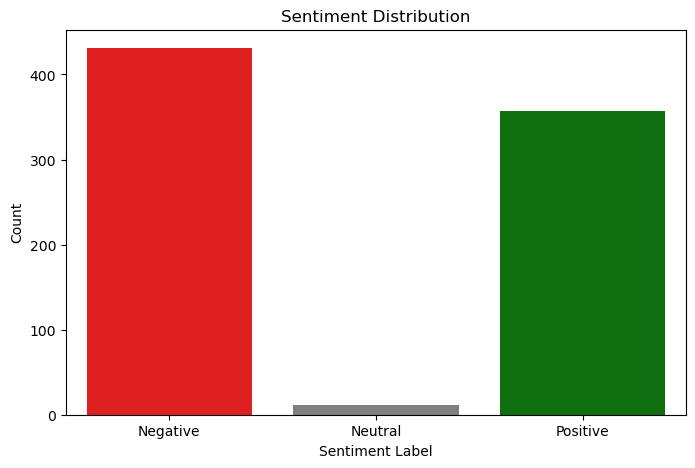

In [37]:
#Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER 
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyzing Review Column
tidy_df["Sentiment"] = tidy_df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify reviews as Positive, Negative, or Neutral
tidy_df["Sentiment_Label"] = tidy_df["Sentiment"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Count sentiment distribution
print(tidy_df["Sentiment_Label"].value_counts())

# Display the first few rows
print(tidy_df[["Review", "Sentiment", "Sentiment_Label"]].head())

# Set figure size
plt.figure(figsize=(8,5))

# Create a bar plot
sns.countplot(x="Sentiment_Label", data=tidy_df, palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})

# Add title and labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")

# Show plot
plt.show()







The sentiment analysis shows that 431 reviews (majority) are negative, indicating dissatisfaction, while 357 reviews are positive, suggesting a significant number of happy customers. Only 12 reviews are neutral, meaning most customers have strong opinions about their experience.









In [36]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

tidy_df["Sentiment"] = tidy_df["Review"].apply(get_sentiment)

# Fake Review Detection (Basic Heuristics)
def detect_fake_review(text):
    if len(text.split()) < 5:
        return True
    if "excellent service" in text or "very bad" in text:
        return True
    return False

tidy_df["Fake_Review"] = tidy_df["Review"].apply(detect_fake_review)
print(tidy_df[tidy_df["Fake_Review"]][["Review", "Sentiment", "Fake_Review"]])



                                                Review  Sentiment  Fake_Review
213  ✅ Trip Verified |   The check in area for prem...   0.181096         True
452  ✅ Trip Verified | BA 242 on the 6/2/23. Boardi...   0.493750         True
482  ✅ Trip Verified |  Another BA Shambles. Starte...   0.293125         True
630  ✅ Trip Verified |  The short haul flights were...   0.084928         True
681  ✅ Trip Verified |  I used British Airways for ...   0.279259         True


The low number of fake reviews suggests that most reviews appear genuine, NLP techniques could improve accuracy in identifying more sophisticated fake reviews.

In [39]:
#Topic Modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words="english")
doc_term_matrix = vectorizer.fit_transform(tidy_df["Review"])

# Apply LDA
lda = LatentDirichletAllocation(n_componentsc=5, random_state=42)  # Adjust n_components based on topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components based on topics
lda.fit(doc_term_matrix)

# Get words per topic
words = vectorizer.get_feature_names_out()

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"\nTOP WORDS FOR TOPIC #{index + 1}")
    print([words[i] for i in topic.argsort()[-10:]])  # Top 10 words per topic



TOP WORDS FOR TOPIC #1
['cabin', 'seat', 'class', 'food', 'good', 'crew', 'trip', 'verified', 'ba', 'flight']

TOP WORDS FOR TOPIC #2
['world', 'staff', 'verified', 'ground', 'airline', 'trip', 'crew', 'british', 'airways', 'luggage']

TOP WORDS FOR TOPIC #3
['hours', 'cancelled', 'service', 'airways', 'trip', 'told', 'british', 'verified', 'ba', 'flight']

TOP WORDS FOR TOPIC #4
['luggage', 'customer', 'time', 'check', 'trip', 'staff', 'verified', 'service', 'flight', 'ba']

TOP WORDS FOR TOPIC #5
['lhr', 'british', 'lounge', 'check', 'minutes', '15', 'trip', 'verified', 'flight', 'ba']


Topic 1: Focuses on the in-flight experience, including seating, food, and crew service, indicating passenger comfort and satisfaction.

Topic 2: Highlights ground staff, luggage handling, and overall airline service, pointing to operational efficiency and customer interactions.

Topic 3: Centers on flight cancellations and service disruptions, suggesting customer frustrations with delays and communication.

Topic 4: Emphasizes luggage handling, customer service, and check-in experiences, indicating potential pain points in baggage management.

Topic 5: Relates to airport lounges, check-in times, and British Airways (LHR), suggesting discussions around premium services and efficiency.

This analysis provides insights into key customer concerns and satisfaction areas.

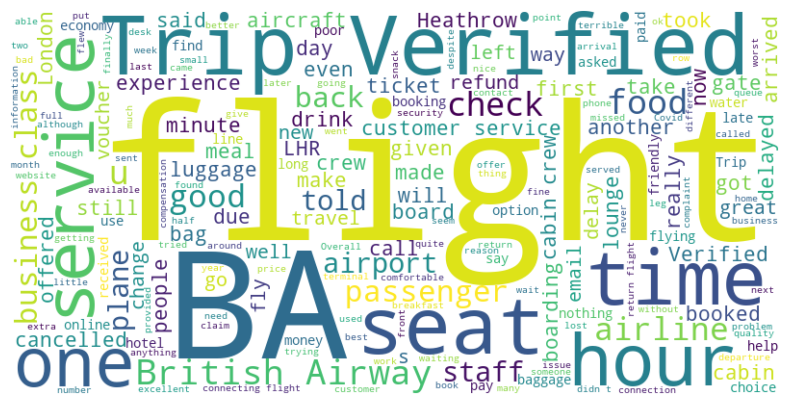

In [5]:
#Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into one string
text = " ".join(tidy_df["Review"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


The word cloud highlights key terms from airline reviews, with words like "flight," "BA," "seat," and "service" appearing most frequently, indicating common discussion points. The prominence of words such as "delayed," "check," and "luggage" suggests a mix of both positive and negative experiences.

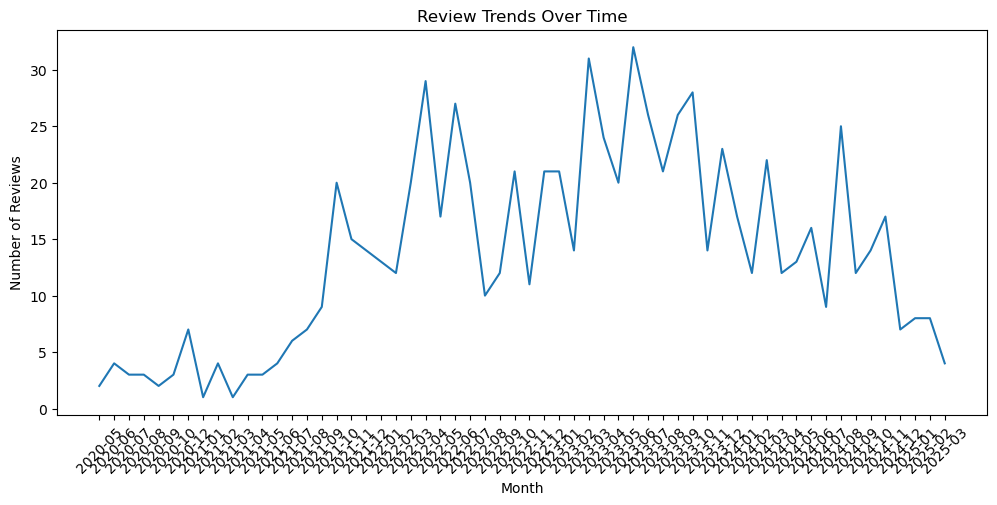

In [7]:
#Review Trends Over Time
import seaborn as sns

# Convert 'Date' column to datetime if not already
tidy_df["Date"] = pd.to_datetime(tidy_df["Date"])

# Group reviews by month/year and count them
tidy_df_trend = tidy_df.groupby(tidy_df["Date"].dt.to_period("M")).size()

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=tidy_df_trend.index.astype(str), y=tidy_df_trend.values)
plt.xticks(rotation=45)
plt.title("Review Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()


The line chart shows the trend of customer reviews over time, with a noticeable increase in review activity leading to peak periods, followed by fluctuations and a gradual decline. This suggests that customer engagement was high during March-April in 2022, May-June 2023 and July-August 2024 possibly due to travel seasons, airline performance, or external factors affecting review frequency.

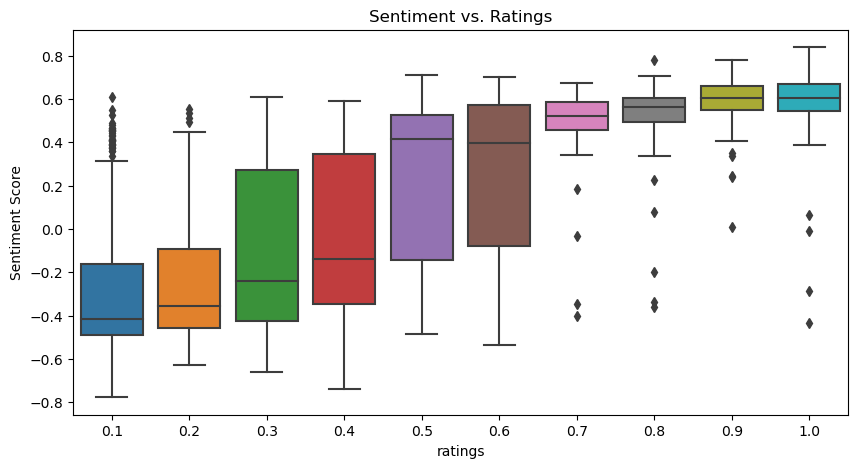

In [10]:
import seaborn as sns


# Plot sentiment vs. rating
plt.figure(figsize=(10, 5))
sns.boxplot(x=tidy_df["ratings"], y=tidy_df["Combined_Sentiment"])
plt.title("Sentiment vs. Ratings")
plt.xlabel("ratings")
plt.ylabel("Sentiment Score")
plt.show()


The box plot shows a positive correlation between sentiment scores and ratings, where lower ratings have more negative sentiment scores and higher ratings have predominantly positive sentiment scores, with some variability and outliers.

In [13]:
duplicates = tidy_df[tidy_df.duplicated(subset=["Review"], keep=False)]# Finding duplicate reviews
print(duplicates.head())

Empty DataFrame
Columns: [Date, ratings, Title, Review, Sentiment, Sentiment_Label, TextBlob_Sentiment, TextBlob_Label, Combined_Sentiment, Final_Sentiment_Label]
Index: []


## Key take Insights

### Key Insights from Sentiment Analysis  

1. Overall sentiment analysis shows that 431 reviews (majority) are negative, indicating dissatisfaction, while 357 reviews are positive, suggesting a significant number of happy customers. Only 12 reviews are neutral, meaning most customers have strong opinions about their experience.  

2. Word cloud highlights key terms from airline reviews, with words like "flight," "BA," "seat," and "service" appearing most frequently, indicating common discussion points. 

3. Review Trends Over Time: Customer review activity peaked during specific travel seasons (March-April 2022, May-June 2023, and July-August 2024), suggesting seasonal variations or airline performance influences.  

4. Sentiment vs. Ratings: Higher ratings correlate with positive sentiment, while lower ratings show negative sentiment, though some mismatches exist, highlighting potential anomalies in customer feedback.  